In [91]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib
import datetime
from random import randint

daily_dir = f"data{os.sep}time_series_box_office_data{os.sep}"

path = os.getcwd()

path = os.path.join(path, daily_dir)

csv_files = glob.glob(os.path.join(path, '*.csv'))

movie_names = np.empty(len(csv_files),dtype='<U100')
daily = {}

for i,f in enumerate(csv_files):
    #Get the keys for our dictionary
    movie_names[i] = f[f.find('office_data'):]
    movie_names[i] = movie_names[i][movie_names[i].find(f'{os.sep}'):]
    movie_names[i] = movie_names[i][:movie_names[i].find('___')]
    movie_names[i] = movie_names[i].replace(f'{os.sep}','')
    # read the csv file
    daily[movie_names[i]] = pd.read_csv(f)
    daily[movie_names[i]] = daily[movie_names[i]].drop("Unnamed: 0", axis=1)

In [54]:
def plot_daily_v_days(dic, movie_names, year=None, specific=None):
    '''
    Plot function to plot daily box office of movies.
    Disclaimer: This code was written in the late afternoon and has not been reviewed yet, so there might be
    a few bugs or not so nice lines. However, for the intended function, it does work.
    
    dic - dictionary of movies: key=movie name, value=pandas dataframe with movie data
    movie_names - list of movie names
    year - (deafult=None) year of movie release
    specific - (deafult=None) specific movie title in question
    
    '''
    
    fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(12, 6))
    if specific != None:
        dic = dic[specific]
        dic['days'] = pd.to_datetime(dic.days)
        locator = matplotlib.dates.AutoDateLocator(minticks=3, maxticks=7)
        formatter = matplotlib.dates.ConciseDateFormatter(locator)
        axs.xaxis.set_major_locator(locator)
        axs.xaxis.set_major_formatter(formatter)

        plt.plot_date(dic['days'], dic['daily'], '-', label=specific.replace('_', ' '))
        
        dic['special events'] = dic['special events'].fillna(0)
            
        xmin = datetime.datetime(2000, 1, 1)
        xmax = datetime.datetime(2000, 1, 1)

        for i in range(len(dic)):
            label = None
            if dic['special events'][i] != 0 and xmin == datetime.datetime(2000, 1, 1):
                xmin = dic['days'][i]

            if dic['special events'][i] == 0 and xmin != datetime.datetime(2000, 1, 1):
                xmax = dic['days'][i-1]
                
            if i == len(dic)-1 and xmax == datetime.datetime(2000, 1, 1):
                xmax = dic['days'][i]
                
            if xmin != datetime.datetime(2000, 1, 1) and xmax != datetime.datetime(2000, 1, 1):
                label = dic['special events'][i-1]
                color = 'red'
                alpha = 1
                if 'COVID' in label:
                    color = 'purple'
                    alpha = 0.15
                plt.axvspan(xmin,xmax, alpha=alpha, color=color, label=label)
                xmin = datetime.datetime(2000, 1, 1)
                xmax = datetime.datetime(2000, 1, 1)
                
        #The next part is more or less copied from stack overflow: 
        #https://stackoverflow.com/questions/61287041/how-to-highlight-weekends-in-matplotlib-plots
        dic = dic.set_index('days')
        dic['weekend'] = dic['dow'].apply(lambda x: x.endswith(('Saturday', 'Sunday')))

        for l in range(dic['weekend'].sum() // 2):
            plt.axvspan(dic[dic['weekend']].index[2*l],
                dic[dic['weekend']].index[2*l+1],
                alpha=0.5, color='magenta')
            if l == (dic['weekend'].sum() // 2) - 1: #Only last one will be labeled.
                plt.axvspan(dic[dic['weekend']].index[2*l],
                dic[dic['weekend']].index[2*l+1],
                alpha=0.5, color='magenta', label='Weekend')
        plt.legend(bbox_to_anchor=(1.1, 1.05))
        
        
    else:
        for i in movie_names:
            if year==None:
                dates = matplotlib.dates.date2num(dic[i]['days'])
                locator = matplotlib.dates.AutoDateLocator(minticks=3, maxticks=7)
                formatter = matplotlib.dates.ConciseDateFormatter(locator)
                axs.xaxis.set_major_locator(locator)
                axs.xaxis.set_major_formatter(formatter)
                
                plt.plot_date(dates, dic[i]['daily'], '-', label=i.replace('_', ' '))
                plt.legend(bbox_to_anchor=(1.22, 1))
                plt.title('Movies released from 2015 to 2020')
                
                
                
            else:
                if year in dic[i]['days'][0]:
                    dates = matplotlib.dates.date2num(dic[i]['days'])
                    locator = matplotlib.dates.AutoDateLocator(minticks=3, maxticks=7)
                    formatter = matplotlib.dates.ConciseDateFormatter(locator)
                    axs.xaxis.set_major_locator(locator)
                    axs.xaxis.set_major_formatter(formatter)

                    plt.plot_date(dates, dic[i]['daily'], '-', label=i.replace('_',' '))
                    plt.legend(bbox_to_anchor=(1.22, 1))
                    plt.title('Movies released in '+year)



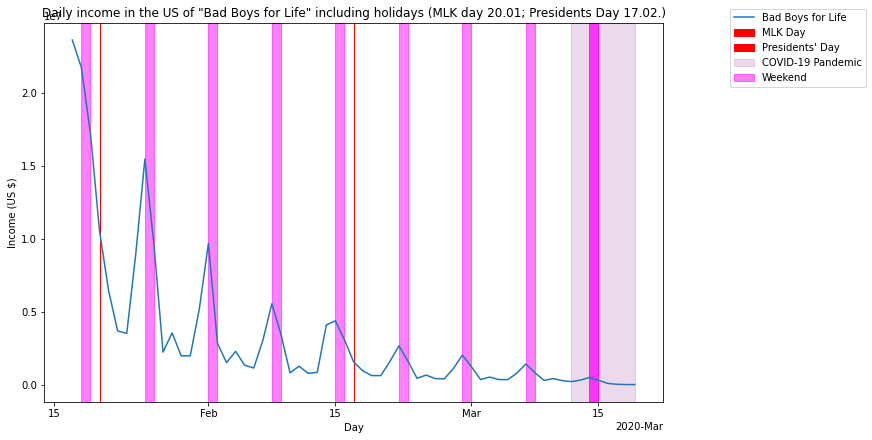

In [68]:
plot_daily_v_days(daily, movie_names, year = None, specific='Bad_Boys_for_Life')
plt.title('Daily income in the US of "Bad Boys for Life" including holidays (MLK day 20.01; Presidents Day 17.02.)')
plt.xlabel('Day')
plt.ylabel('Income (US $)');